In [1]:
# Import Libraries
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import missingno as msno

In [4]:
# Load Data
csv_list = ['data/mean_sales.csv', 'data/home_values.csv', 'data/sales.csv', 'data/market_heat_index.csv']
#creating list of dfs from csvs
df_list = [pd.read_csv(data) for data in csv_list] 
#create df for each file (combine later)
zmean_sales_data, zhvi_data, zsales_data, zmhi_data = df_list

In [5]:
#summarize mean sales data
zmean_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Columns: 889 entries, RegionID to 2025-01-04
dtypes: float64(884), int64(2), object(3)
memory usage: 1.0+ MB


In [6]:
zmean_sales_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2024-11-02,2024-11-09,2024-11-16,2024-11-23,2024-11-30,2024-12-07,2024-12-14,2024-12-21,2024-12-28,2025-01-04
0,102001,0,United States,country,NaN,242520.0,238061.0,241567.0,231941.0,242231.0,...,490406.0,487547.0,490120.0,480477.0,466336.0,494170.0,479480.0,475459.0,464964.0,475268.0
1,394913,1,"New York, NY",msa,NY,515693.0,513959.0,531621.0,489292.0,478127.0,...,816554.0,792809.0,832223.0,791804.0,799304.0,798750.0,783696.0,794648.0,802263.0,780305.0
2,753899,2,"Los Angeles, CA",msa,CA,643683.0,684976.0,668933.0,669512.0,660234.0,...,1286783.0,1294163.0,1224034.0,1223551.0,1235895.0,1308884.0,1253488.0,1228749.0,1230238.0,1228981.0
3,394463,3,"Chicago, IL",msa,IL,294145.0,294681.0,286149.0,261971.0,267571.0,...,410608.0,387637.0,409731.0,396713.0,363261.0,408384.0,391429.0,401714.0,355250.0,386965.0
4,394514,4,"Dallas, TX",msa,TX,176861.0,180037.0,199360.0,181649.0,195115.0,...,487010.0,510358.0,512404.0,508901.0,469081.0,509330.0,513957.0,514308.0,462153.0,487853.0


In [7]:
#summarize home value index data
zhvi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 306 entries, RegionID to 2025-01-31
dtypes: float64(301), int64(2), object(3)
memory usage: 2.1+ MB


In [8]:
zhvi_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31
0,102001,0,United States,country,NaN,119926.267969,120130.844382,120384.672570,120929.808323,121557.288314,...,350214.020175,351698.162896,352339.229865,352551.024331,352834.209123,353318.979490,353958.097262,354528.402056,3.553211e+05,3.560025e+05
1,394913,1,"New York, NY",msa,NY,214960.607913,215869.168656,216782.852613,218630.807340,220534.713940,...,667700.587361,672608.818073,675802.038366,678424.245282,682039.489858,686150.349830,689931.991062,692764.755513,6.943543e+05,6.951709e+05
2,753899,2,"Los Angeles, CA",msa,CA,228161.991747,229032.737795,230166.267205,232425.338127,234877.031080,...,958133.750197,964711.889456,969167.113618,973877.213457,979435.328906,986267.307133,991948.412835,996909.029580,1.001390e+06,1.002067e+06
3,394463,3,"Chicago, IL",msa,IL,153598.367028,153747.494011,154022.113038,154705.228491,155521.579567,...,325022.246861,327299.589163,328624.592527,329422.219454,330370.763230,331491.953236,332637.326938,333923.838011,3.353661e+05,3.368000e+05
4,394514,4,"Dallas, TX",msa,TX,126263.096052,126318.940006,126387.849956,126562.596872,126787.641849,...,374472.502417,374624.863412,373968.338088,373040.710985,372401.858441,372222.388509,372136.524087,371874.304814,3.713634e+05,3.708453e+05


In [9]:
#summarize sales data
zsales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Columns: 209 entries, RegionID to 2025-01-31
dtypes: float64(204), int64(2), object(3)
memory usage: 153.6+ KB


In [10]:
zsales_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31
0,102001,0,United States,country,NaN,202385.0,234142.0,259980.0,286501.0,299727.0,...,321473.0,354838.0,330319.0,346948.0,337155.0,290315.0,310196.0,267934.0,273375.0,209612.0
1,394913,1,"New York, NY",msa,NY,8583.0,9076.0,10098.0,10499.0,11400.0,...,11045.0,12367.0,12698.0,14363.0,14519.0,12159.0,12403.0,10533.0,11718.0,9469.0
2,753899,2,"Los Angeles, CA",msa,CA,4134.0,5039.0,6073.0,6873.0,7222.0,...,6719.0,7130.0,6393.0,7029.0,6804.0,5876.0,6652.0,5688.0,5911.0,4493.0
3,394463,3,"Chicago, IL",msa,IL,5579.0,6917.0,7233.0,7945.0,8783.0,...,9305.0,10222.0,9777.0,10269.0,9901.0,8261.0,8465.0,7604.0,7591.0,6101.0
4,394514,4,"Dallas, TX",msa,TX,4883.0,5537.0,5977.0,6658.0,6669.0,...,6991.0,7524.0,6504.0,6897.0,6489.0,5527.0,6032.0,5145.0,5385.0,4104.0


In [11]:
#summarize market heat index data -- buyers/sellers market
zmhi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 90 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    928 non-null    int64  
 1   SizeRank    928 non-null    int64  
 2   RegionName  928 non-null    object 
 3   RegionType  928 non-null    object 
 4   StateName   927 non-null    object 
 5   2018-01-31  878 non-null    float64
 6   2018-02-28  861 non-null    float64
 7   2018-03-31  857 non-null    float64
 8   2018-04-30  866 non-null    float64
 9   2018-05-31  871 non-null    float64
 10  2018-06-30  880 non-null    float64
 11  2018-07-31  879 non-null    float64
 12  2018-08-31  873 non-null    float64
 13  2018-09-30  873 non-null    float64
 14  2018-10-31  866 non-null    float64
 15  2018-11-30  885 non-null    float64
 16  2018-12-31  878 non-null    float64
 17  2019-01-31  881 non-null    float64
 18  2019-02-28  887 non-null    float64
 19  2019-03-31  891 non-null    f

In [12]:
zmhi_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31
0,102001,0,United States,country,NaN,49.0,50.0,52.0,54.0,55.0,...,62.0,59.0,57.0,55.0,53.0,52.0,50.0,50.0,51.0,52.0
1,394913,1,"New York, NY",msa,NY,52.0,52.0,55.0,56.0,55.0,...,87.0,81.0,77.0,76.0,76.0,73.0,69.0,69.0,77.0,85.0
2,753899,2,"Los Angeles, CA",msa,CA,69.0,66.0,66.0,67.0,67.0,...,80.0,74.0,71.0,68.0,66.0,63.0,62.0,63.0,66.0,69.0
3,394463,3,"Chicago, IL",msa,IL,48.0,49.0,51.0,52.0,50.0,...,75.0,71.0,67.0,64.0,61.0,58.0,56.0,55.0,59.0,63.0
4,394514,4,"Dallas, TX",msa,TX,56.0,56.0,58.0,60.0,60.0,...,65.0,60.0,56.0,52.0,50.0,49.0,49.0,49.0,51.0,54.0


In [13]:
#consolidate columns/rows
def remove_column(df, col):
    """removes column from df"""
    return df.drop(col, axis=1)
def remove_row(df, row):
    """removes row from df"""
    return df.drop(row, axis=0)

In [14]:
#remove RegionType -- no value
zmhi_data = remove_column(zmhi_data, 'RegionType')
zsales_data = remove_column(zsales_data, 'RegionType')
zhvi_data = remove_column(zhvi_data, 'RegionType')
zmean_sales_data = remove_column(zmean_sales_data, 'RegionType')

In [15]:
#creating melt function to melt data frames to prep to combine
def melted(df):
    return df.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'StateName'], var_name='date')

In [16]:
zhvi_melt = melted(zhvi_data)
zhvi_melt.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
StateName      object
date           object
value         float64
dtype: object

In [17]:
#function to convert date columns to month & year columns
def month_year(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    return df.drop('date', axis=1)

In [18]:
#convert month/year columns for home value
zhvi_melt = month_year(zhvi_melt)
zhvi_melt.head()

,RegionID,SizeRank,RegionName,StateName,value,month,year
0,102001,0,United States,NaN,119926.267969,1,2000
1,394913,1,"New York, NY",NY,214960.607913,1,2000
2,753899,2,"Los Angeles, CA",CA,228161.991747,1,2000
3,394463,3,"Chicago, IL",IL,153598.367028,1,2000
4,394514,4,"Dallas, TX",TX,126263.096052,1,2000


In [19]:
#rename value column to refelct df value
zhvi_melt = zhvi_melt.rename(columns={'value': 'home_value'})
zhvi_melt.head()

,RegionID,SizeRank,RegionName,StateName,home_value,month,year
0,102001,0,United States,NaN,119926.267969,1,2000
1,394913,1,"New York, NY",NY,214960.607913,1,2000
2,753899,2,"Los Angeles, CA",CA,228161.991747,1,2000
3,394463,3,"Chicago, IL",IL,153598.367028,1,2000
4,394514,4,"Dallas, TX",TX,126263.096052,1,2000


In [20]:
#perform same operations on market heat index
zmhi_melt = melted(zmhi_data)
zmhi_melt = month_year(zmhi_melt)
zmhi_melt = zmhi_melt.rename(columns={'value': 'market_heat_index'})
zmhi_melt.head()

,RegionID,SizeRank,RegionName,StateName,market_heat_index,month,year
0,102001,0,United States,NaN,49.0,1,2018
1,394913,1,"New York, NY",NY,52.0,1,2018
2,753899,2,"Los Angeles, CA",CA,69.0,1,2018
3,394463,3,"Chicago, IL",IL,48.0,1,2018
4,394514,4,"Dallas, TX",TX,56.0,1,2018


In [21]:
#perform same operations on sales data
zsales_melt = melted(zsales_data)
zsales_melt = month_year(zsales_melt)
zsales_melt = zsales_melt.rename(columns={'value': 'number_of_sales'})
zsales_melt.head()

,RegionID,SizeRank,RegionName,StateName,number_of_sales,month,year
0,102001,0,United States,NaN,202385.0,2,2008
1,394913,1,"New York, NY",NY,8583.0,2,2008
2,753899,2,"Los Angeles, CA",CA,4134.0,2,2008
3,394463,3,"Chicago, IL",IL,5579.0,2,2008
4,394514,4,"Dallas, TX",TX,4883.0,2,2008


In [22]:
#melt mean sales df
zmean_sales_melt = melted(zmean_sales_data)
zmean_sales_melt.head()

,RegionID,SizeRank,RegionName,StateName,date,value
0,102001,0,United States,NaN,2008-02-02,242520.0
1,394913,1,"New York, NY",NY,2008-02-02,515693.0
2,753899,2,"Los Angeles, CA",CA,2008-02-02,643683.0
3,394463,3,"Chicago, IL",IL,2008-02-02,294145.0
4,394514,4,"Dallas, TX",TX,2008-02-02,176861.0


In [23]:
#convert to datetime
zmean_sales_melt['date'] = pd.to_datetime(zmean_sales_melt['date'])
zmean_sales_melt.dtypes

RegionID               int64
SizeRank               int64
RegionName            object
StateName             object
date          datetime64[ns]
value                float64
dtype: object

In [24]:
#convert to monthly format then group and take mean 
zmean_sales_melt['date'] = zmean_sales_melt['date'].dt.strftime('%Y-%m') 
zmean_sales_melt = zmean_sales_melt.groupby(['RegionID', 'SizeRank', 'RegionName', 'StateName', 'date'])['value'].mean().reset_index()
zmean_sales_melt.head()

,RegionID,SizeRank,RegionName,StateName,date,value
0,394304,83,"Akron, OH",OH,2008-02,111182.75
1,394304,83,"Akron, OH",OH,2008-03,117496.40
2,394304,83,"Akron, OH",OH,2008-04,116325.50
3,394304,83,"Akron, OH",OH,2008-05,140846.00
4,394304,83,"Akron, OH",OH,2008-06,137244.50


In [25]:
#create month/year columns and update value column name
zmean_sales_melt = month_year(zmean_sales_melt)
zmean_sales_melt = zmean_sales_melt.rename(columns={'value': 'mean_sales_price'})
zmean_sales_melt.head()

,RegionID,SizeRank,RegionName,StateName,mean_sales_price,month,year
0,394304,83,"Akron, OH",OH,111182.75,2,2008
1,394304,83,"Akron, OH",OH,117496.40,3,2008
2,394304,83,"Akron, OH",OH,116325.50,4,2008
3,394304,83,"Akron, OH",OH,140846.00,5,2008
4,394304,83,"Akron, OH",OH,137244.50,6,2008


In [26]:
#analyze missing data
def missing(df):
    missing = pd.concat([df.isnull().sum(axis=0), 100 * df.isnull().mean(axis=0)], axis=1)
    missing.columns=['count', '%']
    return missing.sort_values(by='count', ascending=False)

In [27]:
missing(zmean_sales_melt)

,count,%
mean_sales_price,2596,8.372033
SizeRank,0,0.000000
RegionID,0,0.000000
RegionName,0,0.000000
StateName,0,0.000000
month,0,0.000000
year,0,0.000000


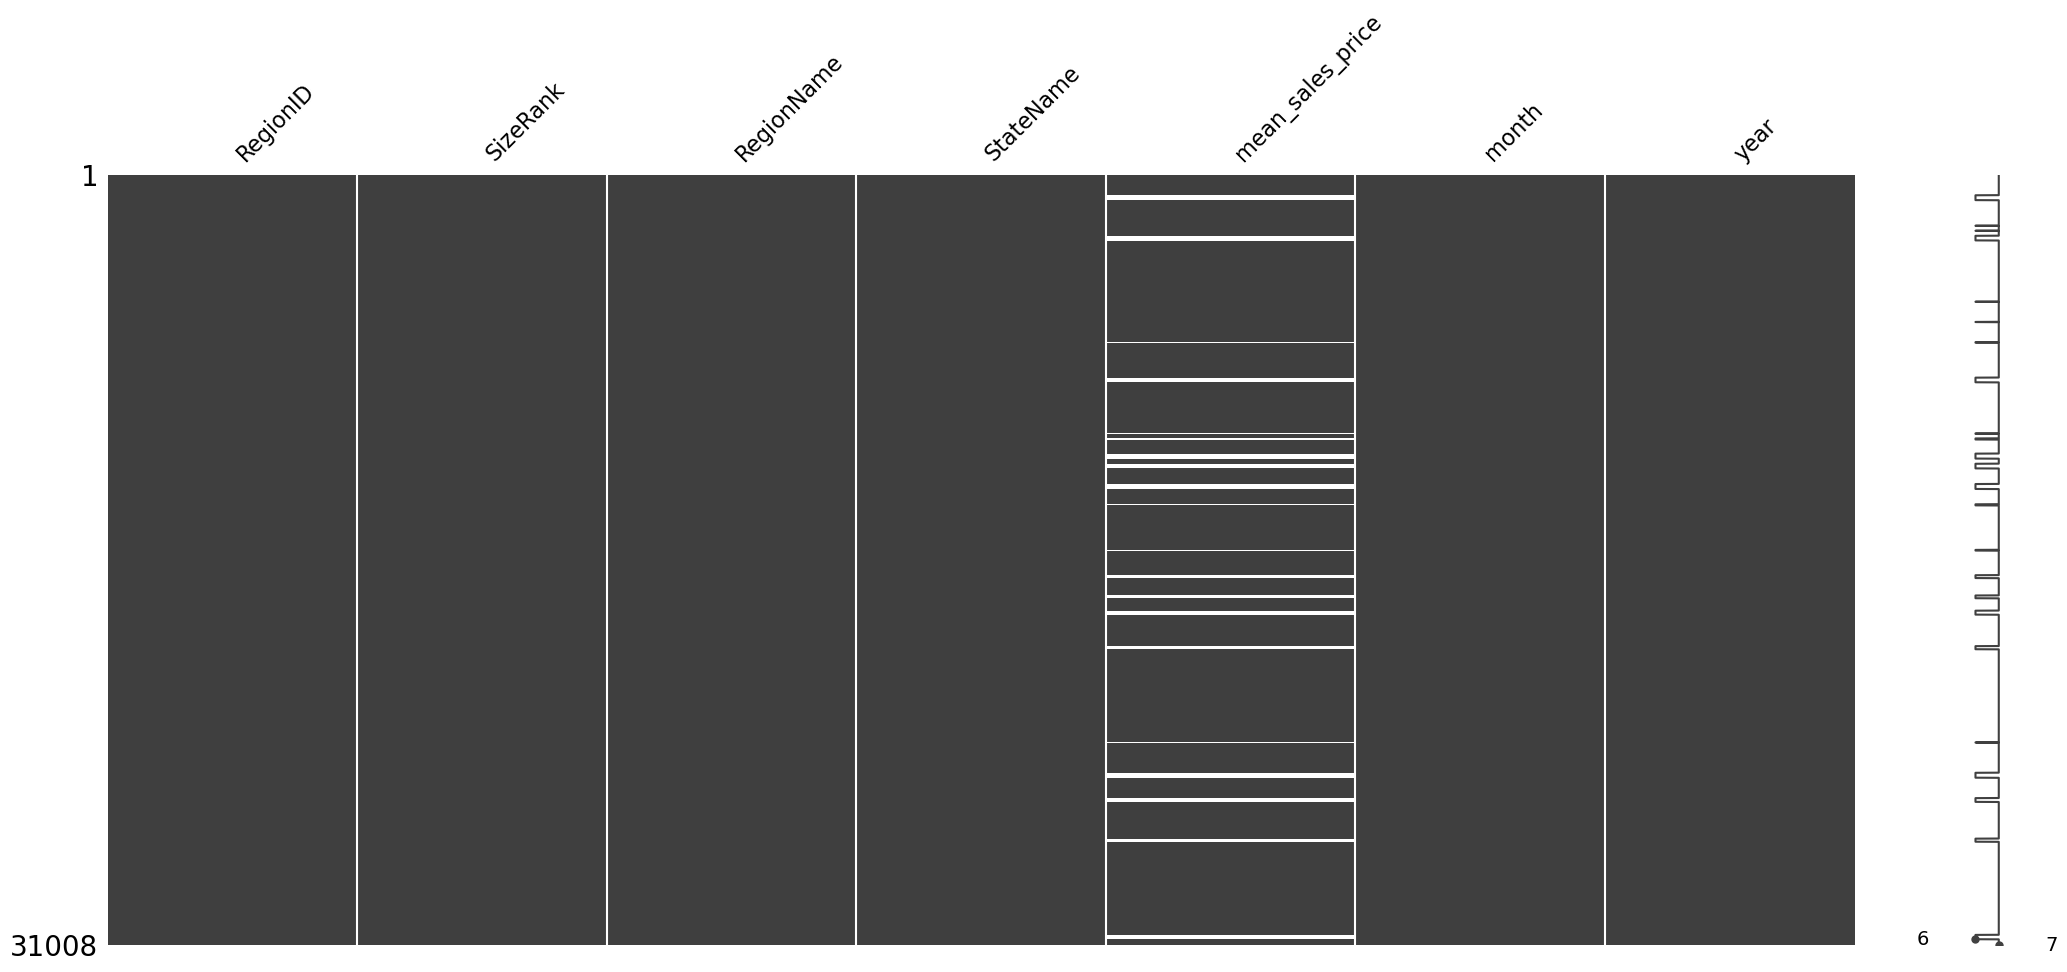

In [28]:
msno.matrix(zmean_sales_melt)
plt.show()

In [29]:
def fill_missing_values(df, value_column):
    """forward fill missing values"""
    grouped_df = df.groupby(['RegionName', 'year', 'month'])[value_column].first().reset_index() #group data by region/month_year
    grouped_df[value_column] = grouped_df[value_column].ffill(limit=6) #forward fill data
    return grouped_df

In [30]:
#fill missing mean_sales data
zmean_sales_filled = fill_missing_values(zmean_sales_melt, 'mean_sales_price')
zmean_sales_filled.head()

,RegionName,year,month,mean_sales_price
0,"Akron, OH",2008,2,111182.75
1,"Akron, OH",2008,3,117496.40
2,"Akron, OH",2008,4,116325.50
3,"Akron, OH",2008,5,140846.00
4,"Akron, OH",2008,6,137244.50


In [31]:
#check if missing values
missing(zmean_sales_filled)

,count,%
mean_sales_price,2452,7.907637
RegionName,0,0.000000
year,0,0.000000
month,0,0.000000


In [32]:
#drop missing values that could not be forward filled as this could skew data
zmean_sales_filled = zmean_sales_filled.dropna()
missing(zmean_sales_filled)

,count,%
RegionName,0,0.0
year,0,0.0
month,0,0.0
mean_sales_price,0,0.0


In [33]:
#merge with original df
mean_sales_df = pd.merge(zmean_sales_melt, zmean_sales_filled, on=['RegionName', 'year', 'month'], how='inner')
mean_sales_df.head()

,RegionID,SizeRank,RegionName,StateName,mean_sales_price_x,month,year,mean_sales_price_y
0,394304,83,"Akron, OH",OH,111182.75,2,2008,111182.75
1,394304,83,"Akron, OH",OH,117496.40,3,2008,117496.40
2,394304,83,"Akron, OH",OH,116325.50,4,2008,116325.50
3,394304,83,"Akron, OH",OH,140846.00,5,2008,140846.00
4,394304,83,"Akron, OH",OH,137244.50,6,2008,137244.50


In [34]:
missing(mean_sales_df)

,count,%
mean_sales_price_x,144,0.504272
RegionID,0,0.000000
RegionName,0,0.000000
SizeRank,0,0.000000
StateName,0,0.000000
month,0,0.000000
year,0,0.000000
mean_sales_price_y,0,0.000000


In [35]:
#keep filled mean_sales_column
mean_sales_df = remove_column(mean_sales_df, 'mean_sales_price_x')
mean_sales_df = mean_sales_df.rename(columns={'mean_sales_price_y': 'mean_sales_price'})
mean_sales_df.head()

,RegionID,SizeRank,RegionName,StateName,month,year,mean_sales_price
0,394304,83,"Akron, OH",OH,2,2008,111182.75
1,394304,83,"Akron, OH",OH,3,2008,117496.40
2,394304,83,"Akron, OH",OH,4,2008,116325.50
3,394304,83,"Akron, OH",OH,5,2008,140846.00
4,394304,83,"Akron, OH",OH,6,2008,137244.50


In [36]:
#compare not filled to filled data
zmean_sales_melt.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,31008.0,413128.664474,84029.539918,394304.0,394544.7500,394852.50,395053.50,845160.0
SizeRank,31008.0,83.335526,55.107000,1.0,39.7500,77.50,117.25,284.0
mean_sales_price,28412.0,293810.430985,201636.219319,67682.0,171207.3125,231573.25,336814.20,2100471.5
month,31008.0,6.500000,3.452108,1.0,3.7500,6.50,9.25,12.0
year,31008.0,2016.083333,4.906849,2008.0,2012.0000,2016.00,2020.00,2025.0


In [37]:
mean_sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,28556.0,411977.286910,80673.459232,394304.0,394532.00,394856.00,395053.00,845160.0
SizeRank,28556.0,76.882266,49.211013,1.0,36.00,72.00,110.00,284.0
month,28556.0,6.490090,3.451270,1.0,3.00,6.00,9.00,12.0
year,28556.0,2016.198277,4.926877,2008.0,2012.00,2016.00,2020.00,2025.0
mean_sales_price,28556.0,294924.352260,203282.382624,67682.0,171484.95,232177.15,339106.75,2100471.5


In [38]:
#checking missing for home value data
missing(zhvi_melt)

,count,%
home_value,49260,18.285417
StateName,301,0.111732
RegionID,0,0.000000
RegionName,0,0.000000
SizeRank,0,0.000000
month,0,0.000000
year,0,0.000000


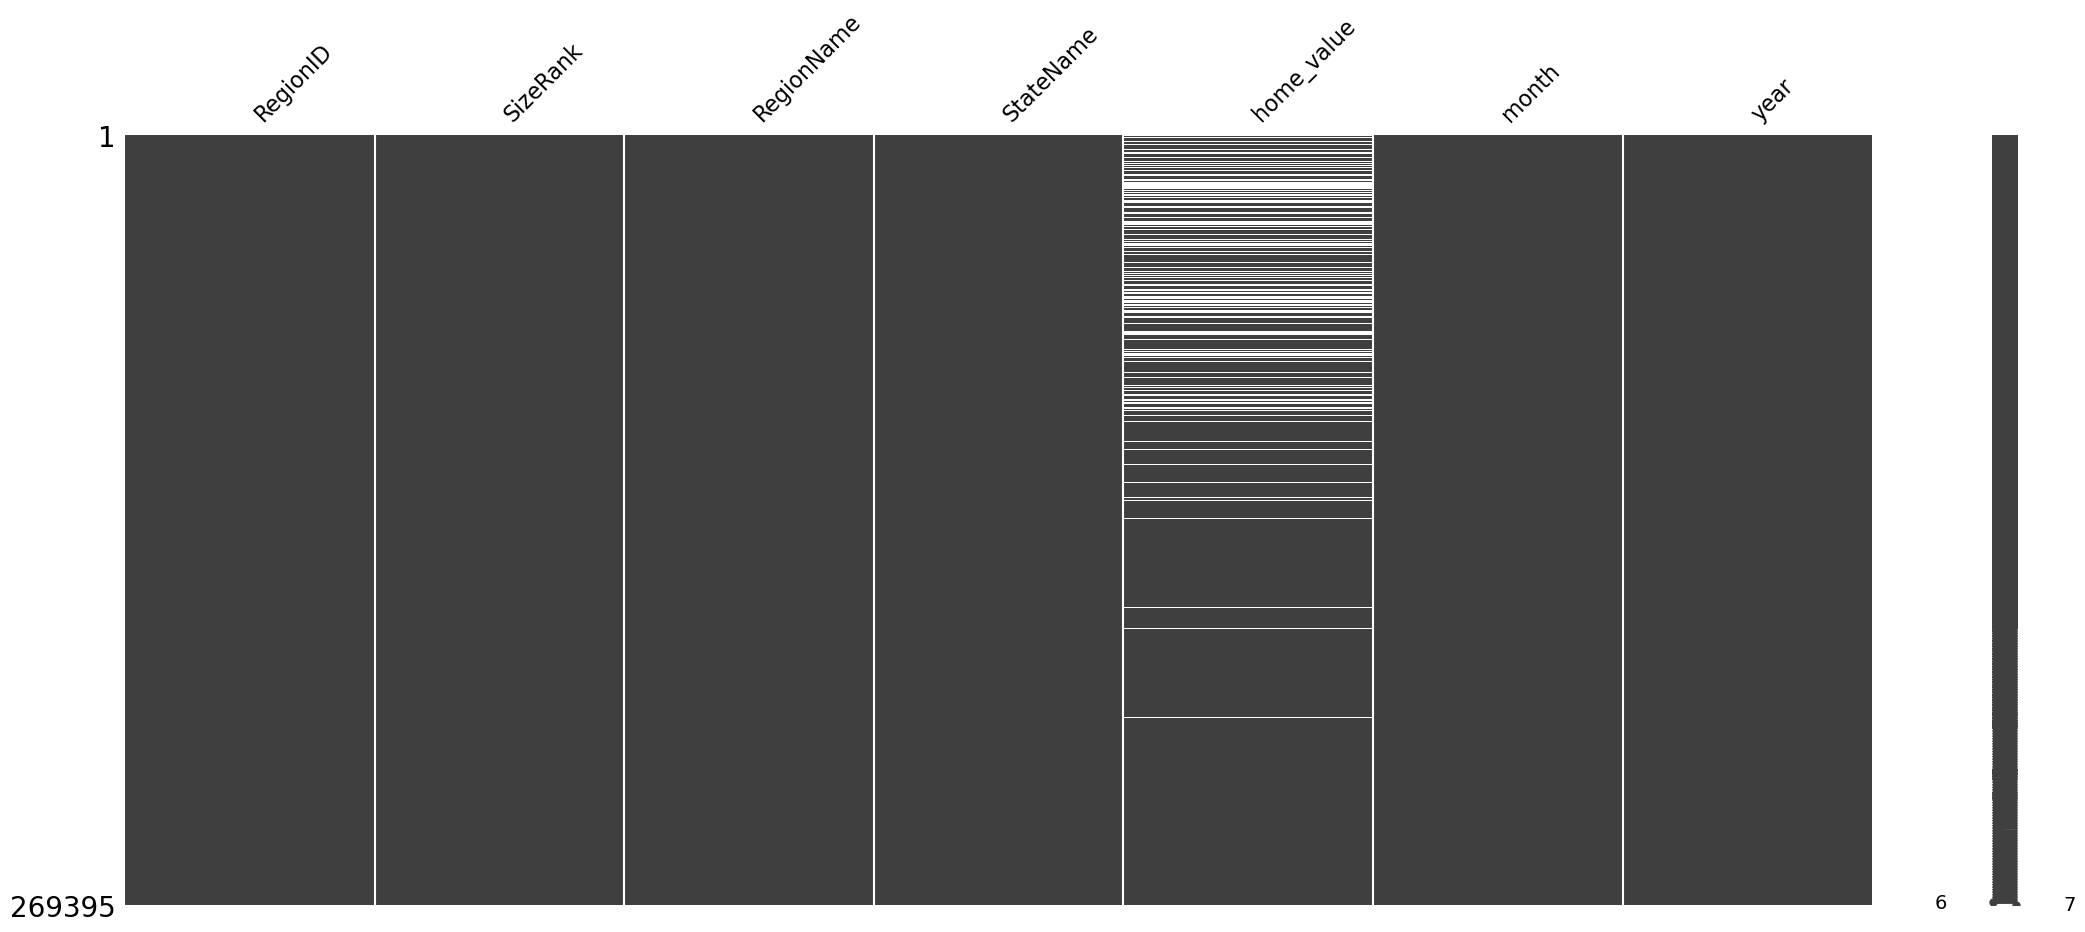

In [39]:
msno.matrix(zhvi_melt)
plt.show()

In [40]:
#drop rows with missing statename (< 5%)
zhvi_melt = zhvi_melt.dropna(subset=['StateName'])
missing(zhvi_melt)

,count,%
home_value,49260,18.305871
SizeRank,0,0.000000
RegionID,0,0.000000
RegionName,0,0.000000
StateName,0,0.000000
month,0,0.000000
year,0,0.000000


In [41]:
#fill missing zhvi values
zhvi_filled = fill_missing_values(zhvi_melt, 'home_value')
missing(zhvi_filled)

,count,%
home_value,46076,17.122641
RegionName,0,0.000000
year,0,0.000000
month,0,0.000000


In [42]:
#drop remaining missing home_values
zhvi_filled = zhvi_filled.dropna()
missing(zhvi_filled)

,count,%
RegionName,0,0.0
year,0,0.0
month,0,0.0
home_value,0,0.0


In [43]:
#merge with original df
home_value_df = pd.merge(zhvi_melt, zhvi_filled, on=['RegionName', 'year', 'month'], how='outer')
home_value_df.head()

,RegionID,SizeRank,RegionName,StateName,home_value_x,month,year,home_value_y
0,394297,677,"Aberdeen, SD",SD,NaN,1,2000,NaN
1,394297,677,"Aberdeen, SD",SD,NaN,2,2000,NaN
2,394297,677,"Aberdeen, SD",SD,NaN,3,2000,NaN
3,394297,677,"Aberdeen, SD",SD,NaN,4,2000,NaN
4,394297,677,"Aberdeen, SD",SD,NaN,5,2000,NaN


In [44]:
#keep filled mean_sales_column
home_value_df = remove_column(home_value_df, 'home_value_x')
home_value_df = home_value_df.rename(columns={'home_value_y': 'home_value'})
home_value_df.head()

,RegionID,SizeRank,RegionName,StateName,month,year,home_value
0,394297,677,"Aberdeen, SD",SD,1,2000,NaN
1,394297,677,"Aberdeen, SD",SD,2,2000,NaN
2,394297,677,"Aberdeen, SD",SD,3,2000,NaN
3,394297,677,"Aberdeen, SD",SD,4,2000,NaN
4,394297,677,"Aberdeen, SD",SD,5,2000,NaN


In [45]:
missing(home_value_df)

,count,%
home_value,46076,17.122641
SizeRank,0,0.000000
RegionID,0,0.000000
RegionName,0,0.000000
StateName,0,0.000000
month,0,0.000000
year,0,0.000000


In [46]:
#drop remaining missing values
home_value_df = home_value_df.dropna()
missing(home_value_df)

,count,%
RegionID,0,0.0
SizeRank,0,0.0
RegionName,0,0.0
StateName,0,0.0
month,0,0.0
year,0,0.0
home_value,0,0.0


In [47]:
home_value_df.head()

,RegionID,SizeRank,RegionName,StateName,month,year,home_value
109,394297,677,"Aberdeen, SD",SD,2,2009,123764.079289
110,394297,677,"Aberdeen, SD",SD,3,2009,123777.301989
111,394297,677,"Aberdeen, SD",SD,4,2009,123588.142706
112,394297,677,"Aberdeen, SD",SD,5,2009,123480.102994
113,394297,677,"Aberdeen, SD",SD,6,2009,123291.024499


In [48]:
#compare unfilled to filled data
zhvi_melt.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,269094.0,412446.539150,77687.508991,394297.000000,394547.000000,394795.500000,395045.000000,7.539290e+05
SizeRank,269094.0,462.268456,268.266389,1.000000,231.000000,460.500000,690.000000,9.390000e+02
home_value,219834.0,178943.036101,124914.140969,34313.175563,105837.734144,143408.582573,206746.278877,1.744104e+06
month,269094.0,6.481728,3.460821,1.000000,3.000000,6.000000,9.000000,1.200000e+01
year,269094.0,2012.043189,7.237889,2000.000000,2006.000000,2012.000000,2018.000000,2.025000e+03


In [49]:
home_value_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,223018.0,412406.107086,77598.674138,394297.000000,394545.00000,394803.000000,395047.000000,7.539290e+05
SizeRank,223018.0,432.348201,267.168777,1.000000,196.00000,418.000000,657.000000,9.390000e+02
month,223018.0,6.458107,3.460222,1.000000,3.00000,6.000000,9.000000,1.200000e+01
year,223018.0,2013.496310,6.957005,2000.000000,2008.00000,2014.000000,2019.000000,2.025000e+03
home_value,223018.0,180161.899667,126150.056317,34313.175563,106158.21842,144149.323882,208373.784215,1.744104e+06


In [50]:
#start process for market heat index
missing(zmhi_melt)

,count,%
market_heat_index,2212,2.804260
StateName,85,0.107759
RegionID,0,0.000000
RegionName,0,0.000000
SizeRank,0,0.000000
month,0,0.000000
year,0,0.000000


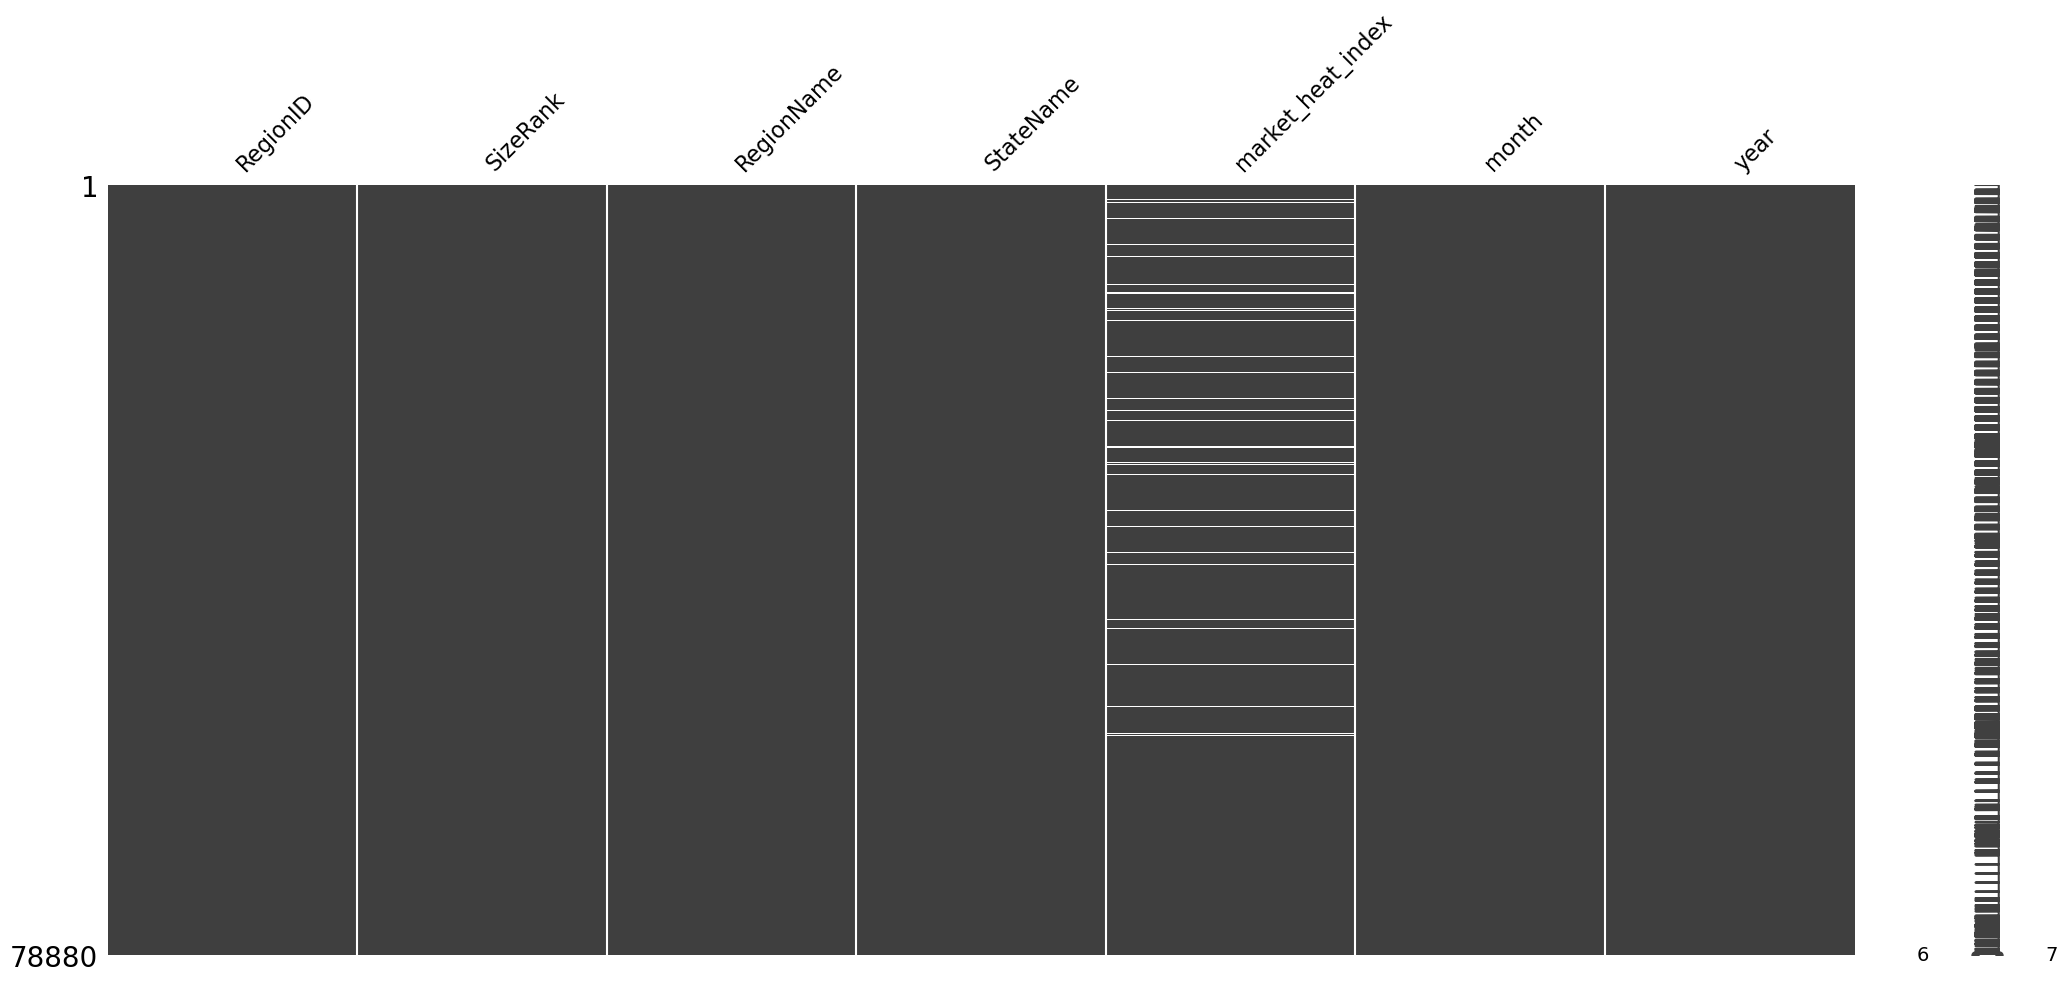

In [51]:
msno.matrix(zmhi_melt)
plt.show()

In [52]:
#drop all na values (< 5%)
market_heat_index_df = zmhi_melt.dropna()
missing(market_heat_index_df)

,count,%
RegionID,0,0.0
SizeRank,0,0.0
RegionName,0,0.0
StateName,0,0.0
market_heat_index,0,0.0
month,0,0.0
year,0,0.0


In [53]:
zmhi_melt.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,78880.0,425513.622845,105754.080721,102001.0,394555.75,394812.5,395073.50,845172.0
SizeRank,78880.0,469.393319,270.988682,0.0,234.75,470.5,703.25,939.0
market_heat_index,76668.0,53.395119,23.051774,-100.0,41.00,52.0,66.00,429.0
month,78880.0,6.435294,3.482574,1.0,3.00,6.0,9.00,12.0
year,78880.0,2021.047059,2.034457,2018.0,2019.00,2021.0,2023.00,2025.0


In [54]:
market_heat_index_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,76583.0,420768.694253,96122.049178,394297.0,394554.0,394808.0,395063.0,845172.0
SizeRank,76583.0,460.895891,268.197543,1.0,229.0,459.0,689.0,939.0
market_heat_index,76583.0,53.385334,23.059863,-100.0,41.0,52.0,66.0,429.0
month,76583.0,6.438896,3.477825,1.0,3.0,6.0,9.0,12.0
year,76583.0,2021.085371,2.031405,2018.0,2019.0,2021.0,2023.0,2025.0


In [55]:
#check missing for sales data
missing(zsales_melt)

,count,%
StateName,204,1.063830
number_of_sales,10,0.052149
RegionID,0,0.000000
RegionName,0,0.000000
SizeRank,0,0.000000
month,0,0.000000
year,0,0.000000


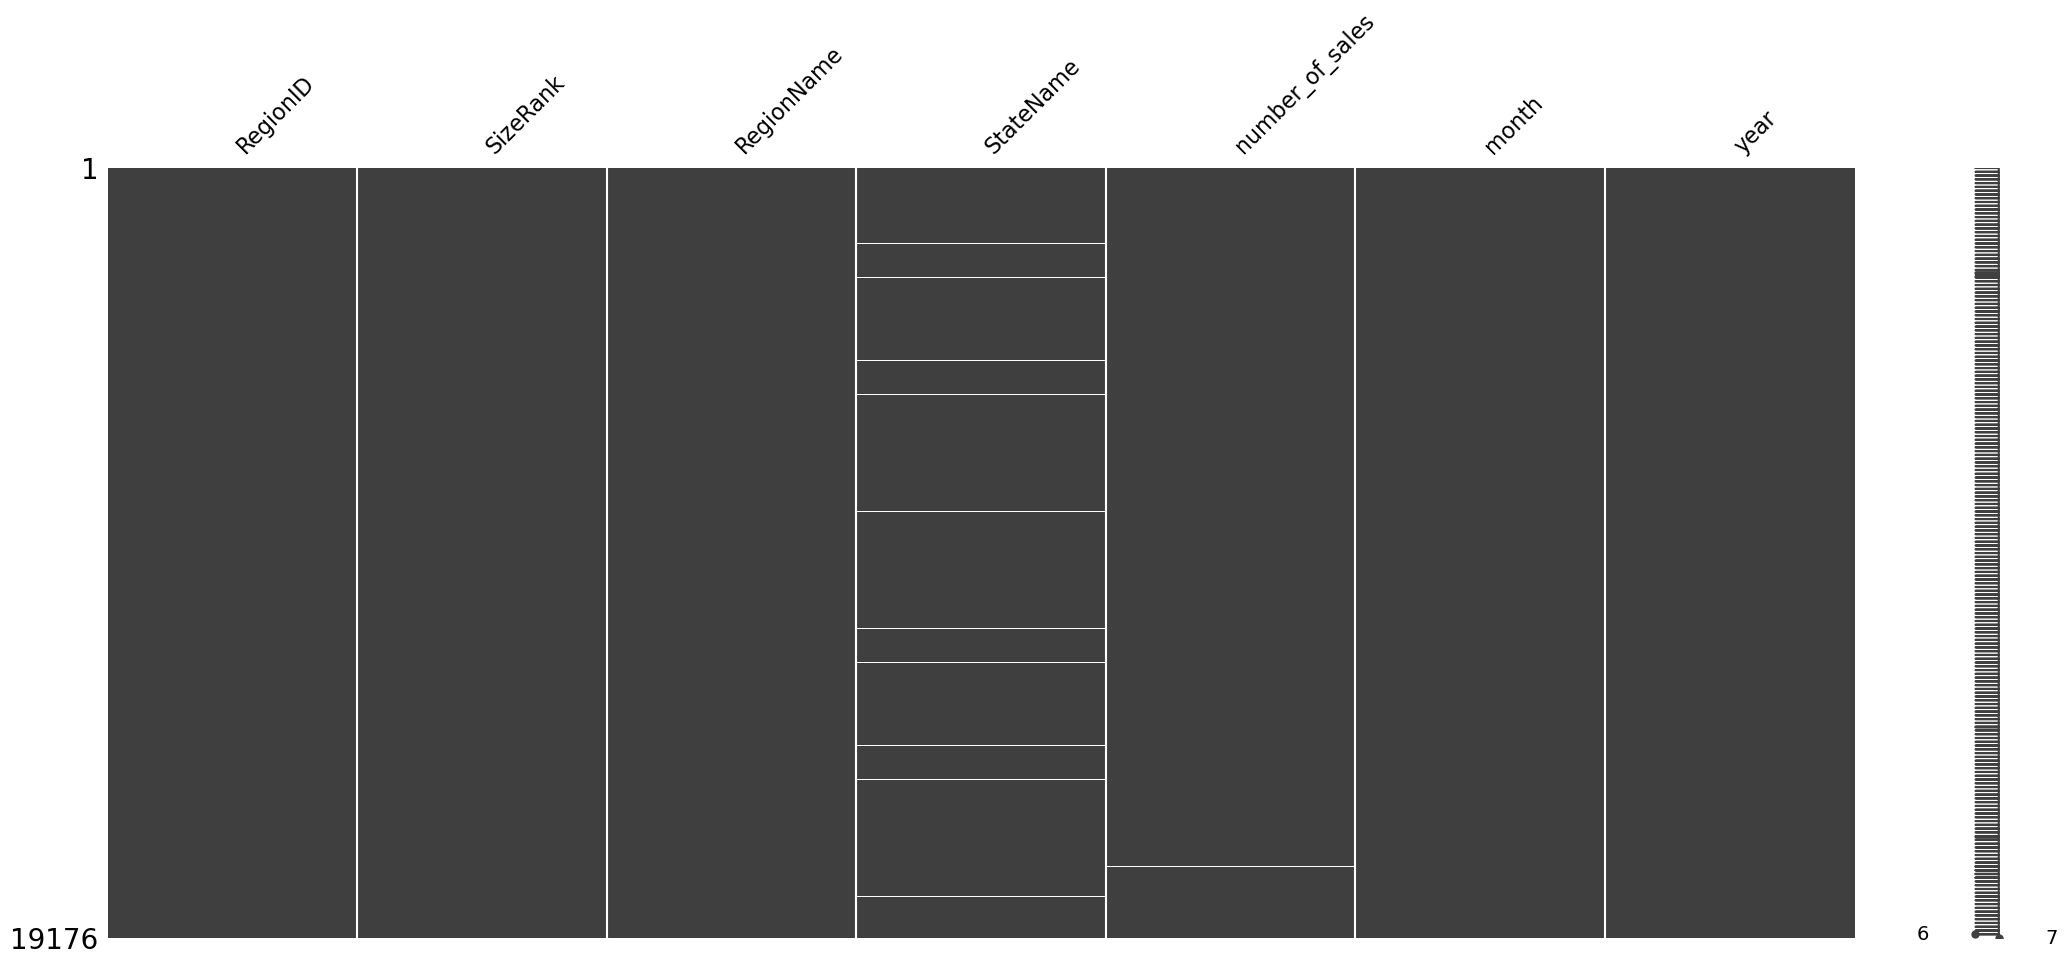

In [56]:
msno.matrix(zsales_melt)
plt.show()

In [57]:
#drop na values (< 5%)
num_sales_df = zsales_melt.dropna()
missing(num_sales_df)

,count,%
RegionID,0,0.0
SizeRank,0,0.0
RegionName,0,0.0
StateName,0,0.0
number_of_sales,0,0.0
month,0,0.0
year,0,0.0


In [58]:
#confirm data is sames
zsales_melt.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,19176.0,403121.734043,70419.145967,102001.0,394492.00,394829.5,395031.00,753924.0
SizeRank,19176.0,48.074468,29.574782,0.0,23.00,47.5,71.00,152.0
number_of_sales,19166.0,6061.879996,36019.210472,39.0,826.00,1440.0,3097.00,582535.0
month,19176.0,6.500000,3.452143,1.0,3.75,6.5,9.25,12.0
year,19176.0,2016.083333,4.906898,2008.0,2012.00,2016.0,2020.00,2025.0


In [59]:
num_sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,18962.0,406365.742063,63472.121285,394304.0,394514.0,394843.0,395031.00,753924.0
SizeRank,18962.0,48.598618,29.295069,1.0,24.0,48.0,71.00,152.0
number_of_sales,18962.0,2454.786679,2643.520590,39.0,822.0,1422.0,3017.00,23983.0
month,18962.0,6.499367,3.452668,1.0,3.0,6.0,9.75,12.0
year,18962.0,2016.082112,4.906215,2008.0,2012.0,2016.0,2020.00,2025.0


In [60]:
#check which removed values altered numbers
zsales_melt.groupby(['RegionName'])['StateName'].apply(lambda x: pd.isna(x).sum()).sort_values()

RegionName
Urban Honolulu, HI      0
Albany, NY              0
Albuquerque, NM         0
Allentown, PA           0
Atlanta, GA             0
                     ... 
Winston, NC             0
Worcester, MA           0
Akron, OH               0
St. Louis, MO           0
United States         204
Name: StateName, Length: 94, dtype: int64

In [61]:
#check if US data affected mean
zsales_melt.groupby('RegionName')['number_of_sales'].mean().sort_values()

RegionName
McAllen, TX            245.663366
El Paso, TX            484.681373
Fort Collins, CO       494.576355
Provo, UT              557.014706
Springfield, MA        575.671569
                        ...      
Los Angeles, CA       8515.294118
Miami, FL             9025.975490
Chicago, IL          10214.877451
New York, NY         13724.881773
United States       341344.740196
Name: number_of_sales, Length: 94, dtype: float64

In [62]:
joined_df = pd.merge(mean_sales_df,
                      num_sales_df,
                      how='left', 
                      on=['RegionID', 'SizeRank', 'RegionName', 'StateName', 'month', 'year'])

In [63]:
joined_df

,RegionID,SizeRank,RegionName,StateName,month,year,mean_sales_price,number_of_sales
0,394304,83,"Akron, OH",OH,2,2008,111182.75,398.0
1,394304,83,"Akron, OH",OH,3,2008,117496.40,403.0
2,394304,83,"Akron, OH",OH,4,2008,116325.50,480.0
3,394304,83,"Akron, OH",OH,5,2008,140846.00,478.0
4,394304,83,"Akron, OH",OH,6,2008,137244.50,603.0
...,...,...,...,...,...,...,...,...
28551,845160,198,"Prescott Valley, AZ",AZ,9,2024,563242.00,NaN
28552,845160,198,"Prescott Valley, AZ",AZ,10,2024,583945.25,NaN
28553,845160,198,"Prescott Valley, AZ",AZ,11,2024,602072.40,NaN
28554,845160,198,"Prescott Valley, AZ",AZ,12,2024,560484.75,NaN


In [64]:
#join dfs
joined_df2 = pd.merge(home_value_df, 
                     market_heat_index_df, 
                     how='outer', 
                     on=['RegionID', 'SizeRank', 'RegionName', 'StateName', 'month', 'year'])

In [65]:
joined_df2

,RegionID,SizeRank,RegionName,StateName,month,year,home_value,market_heat_index
0,394297,677,"Aberdeen, SD",SD,1,2010,122679.563700,NaN
1,394297,677,"Aberdeen, SD",SD,1,2011,124871.277387,NaN
2,394297,677,"Aberdeen, SD",SD,1,2012,126013.529641,NaN
3,394297,677,"Aberdeen, SD",SD,1,2013,137913.331511,NaN
4,394297,677,"Aberdeen, SD",SD,1,2014,139697.047702,NaN
...,...,...,...,...,...,...,...,...
224737,845172,769,"Winfield, KS",KS,12,2020,NaN,54.0
224738,845172,769,"Winfield, KS",KS,12,2021,NaN,41.0
224739,845172,769,"Winfield, KS",KS,12,2022,NaN,38.0
224740,845172,769,"Winfield, KS",KS,12,2023,NaN,37.0


In [66]:
#fully combined df
df = pd.merge(joined_df, 
              joined_df2, 
              how='left', 
              on=['RegionID', 'SizeRank', 'RegionName', 'StateName', 'month', 'year'])

In [67]:
df.head()

,RegionID,SizeRank,RegionName,StateName,month,year,mean_sales_price,number_of_sales,home_value,market_heat_index
0,394304,83,"Akron, OH",OH,2,2008,111182.75,398.0,124307.869610,NaN
1,394304,83,"Akron, OH",OH,3,2008,117496.40,403.0,124112.725495,NaN
2,394304,83,"Akron, OH",OH,4,2008,116325.50,480.0,124067.896104,NaN
3,394304,83,"Akron, OH",OH,5,2008,140846.00,478.0,124246.821831,NaN
4,394304,83,"Akron, OH",OH,6,2008,137244.50,603.0,124224.500972,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28556 entries, 0 to 28555
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RegionID           28556 non-null  int64  
 1   SizeRank           28556 non-null  int64  
 2   RegionName         28556 non-null  object 
 3   StateName          28556 non-null  object 
 4   month              28556 non-null  int32  
 5   year               28556 non-null  int32  
 6   mean_sales_price   28556 non-null  float64
 7   number_of_sales    18372 non-null  float64
 8   home_value         28097 non-null  float64
 9   market_heat_index  12213 non-null  float64
dtypes: float64(4), int32(2), int64(2), object(2)
memory usage: 2.0+ MB


In [69]:
missing(df)

,count,%
market_heat_index,16343,57.231405
number_of_sales,10184,35.663258
home_value,459,1.607368
RegionID,0,0.000000
SizeRank,0,0.000000
RegionName,0,0.000000
year,0,0.000000
month,0,0.000000
StateName,0,0.000000
mean_sales_price,0,0.000000


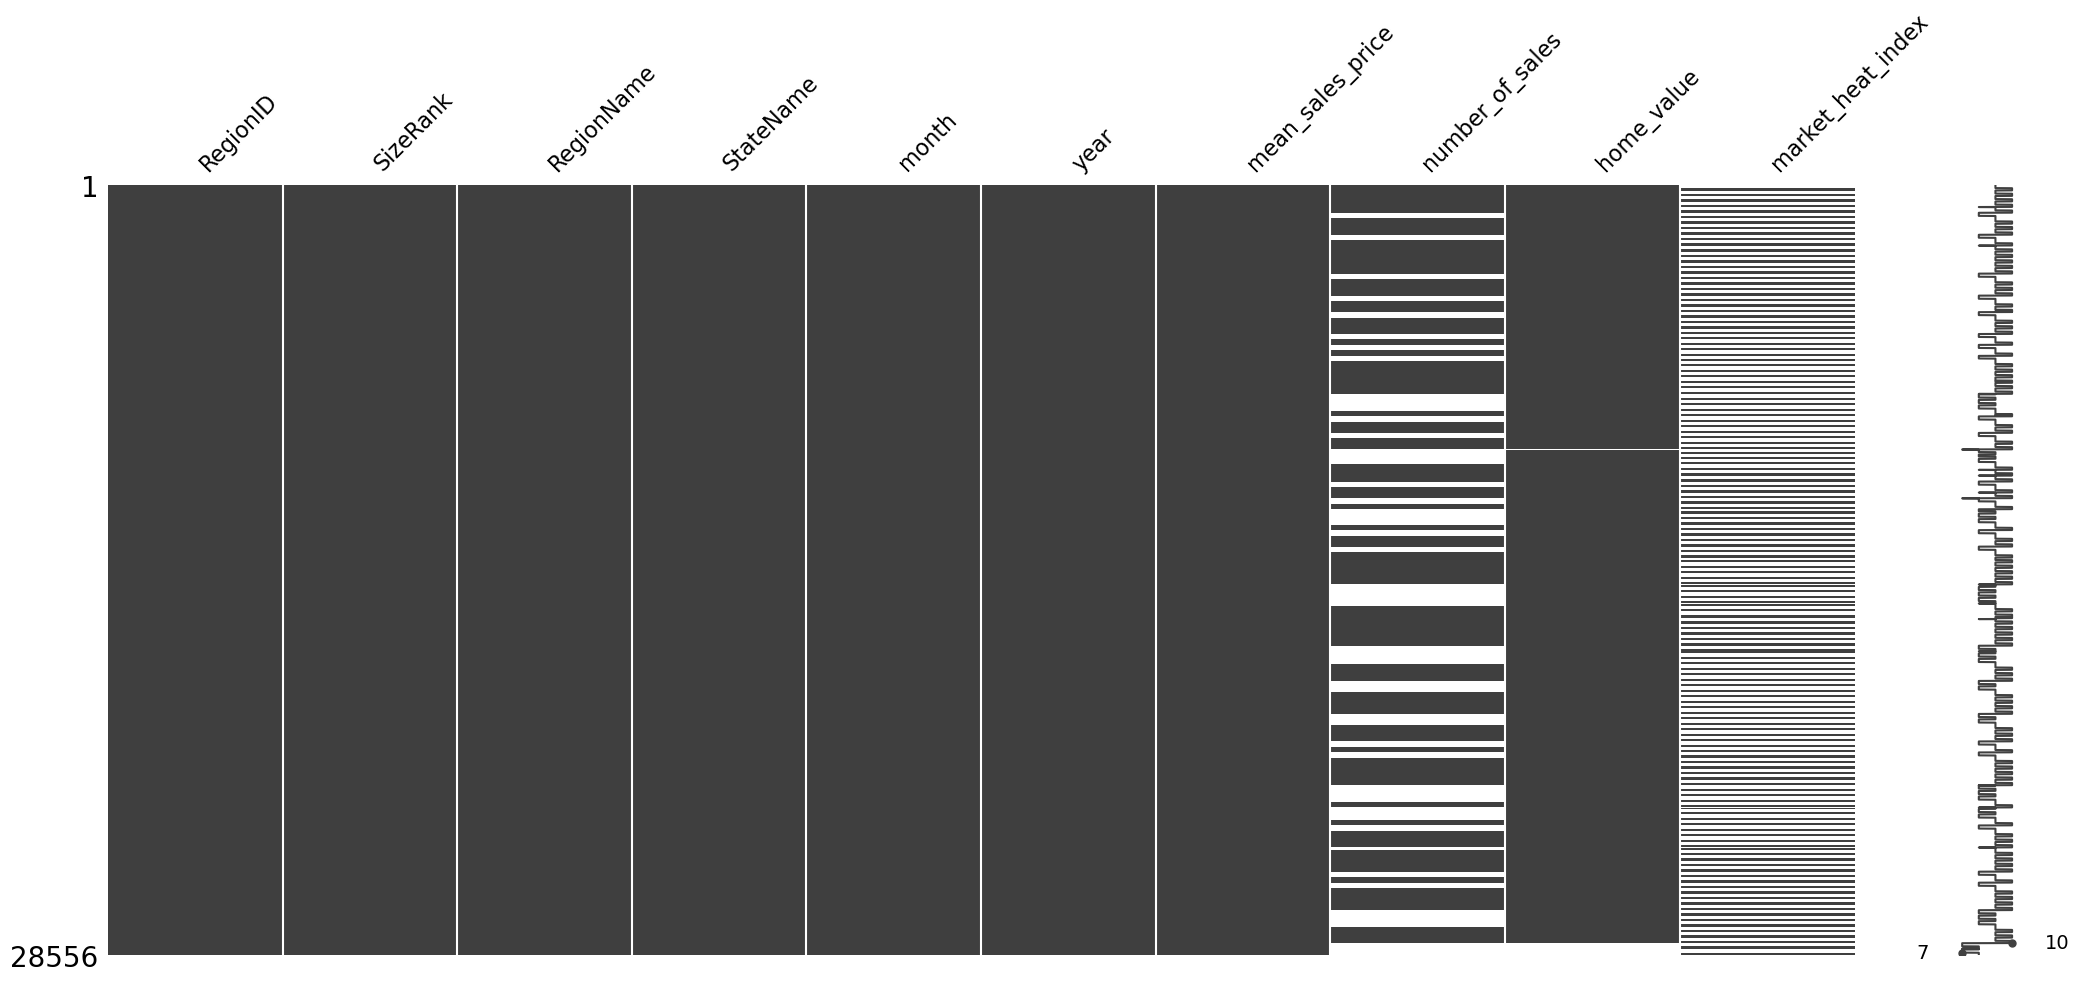

In [70]:
msno.matrix(df)
plt.show()

In [71]:
#dropna for home values (< 5%)
df = df.dropna(subset='home_value')
missing(df)

,count,%
market_heat_index,16079,57.226750
number_of_sales,9725,34.612236
SizeRank,0,0.000000
RegionID,0,0.000000
RegionName,0,0.000000
StateName,0,0.000000
year,0,0.000000
month,0,0.000000
mean_sales_price,0,0.000000
home_value,0,0.000000


In [72]:
#create value surplus column to see difference of home value vs. sales price - How often do they sell over value?
df['value_surplus'] = df['mean_sales_price'] - df['home_value']
df.head()

,RegionID,SizeRank,RegionName,StateName,month,year,mean_sales_price,number_of_sales,home_value,market_heat_index,value_surplus
0,394304,83,"Akron, OH",OH,2,2008,111182.75,398.0,124307.869610,NaN,-13125.119610
1,394304,83,"Akron, OH",OH,3,2008,117496.40,403.0,124112.725495,NaN,-6616.325495
2,394304,83,"Akron, OH",OH,4,2008,116325.50,480.0,124067.896104,NaN,-7742.396104
3,394304,83,"Akron, OH",OH,5,2008,140846.00,478.0,124246.821831,NaN,16599.178169
4,394304,83,"Akron, OH",OH,6,2008,137244.50,603.0,124224.500972,NaN,13019.999028


In [73]:
#clean up column names
df.rename(columns={'SizeRank': 'pop_rank', 'RegionName': 'city', 'StateName': 'state'}, inplace=True)
df.head()

,RegionID,pop_rank,city,state,month,year,mean_sales_price,number_of_sales,home_value,market_heat_index,value_surplus
0,394304,83,"Akron, OH",OH,2,2008,111182.75,398.0,124307.869610,NaN,-13125.119610
1,394304,83,"Akron, OH",OH,3,2008,117496.40,403.0,124112.725495,NaN,-6616.325495
2,394304,83,"Akron, OH",OH,4,2008,116325.50,480.0,124067.896104,NaN,-7742.396104
3,394304,83,"Akron, OH",OH,5,2008,140846.00,478.0,124246.821831,NaN,16599.178169
4,394304,83,"Akron, OH",OH,6,2008,137244.50,603.0,124224.500972,NaN,13019.999028


In [74]:
#remove regionid column
df = remove_column(df, 'RegionID')
df.head()

,pop_rank,city,state,month,year,mean_sales_price,number_of_sales,home_value,market_heat_index,value_surplus
0,83,"Akron, OH",OH,2,2008,111182.75,398.0,124307.869610,NaN,-13125.119610
1,83,"Akron, OH",OH,3,2008,117496.40,403.0,124112.725495,NaN,-6616.325495
2,83,"Akron, OH",OH,4,2008,116325.50,480.0,124067.896104,NaN,-7742.396104
3,83,"Akron, OH",OH,5,2008,140846.00,478.0,124246.821831,NaN,16599.178169
4,83,"Akron, OH",OH,6,2008,137244.50,603.0,124224.500972,NaN,13019.999028


In [75]:
#remove state from city
df['city'] = df['city'].str.split(',').str[0]
df.head()

,pop_rank,city,state,month,year,mean_sales_price,number_of_sales,home_value,market_heat_index,value_surplus
0,83,Akron,OH,2,2008,111182.75,398.0,124307.869610,NaN,-13125.119610
1,83,Akron,OH,3,2008,117496.40,403.0,124112.725495,NaN,-6616.325495
2,83,Akron,OH,4,2008,116325.50,480.0,124067.896104,NaN,-7742.396104
3,83,Akron,OH,5,2008,140846.00,478.0,124246.821831,NaN,16599.178169
4,83,Akron,OH,6,2008,137244.50,603.0,124224.500972,NaN,13019.999028


In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop_rank,28097.0,75.977506,48.496695,1.000000,36.000000,71.000000,110.000000,2.840000e+02
month,28097.0,6.491903,3.451711,1.000000,3.000000,6.000000,9.000000,1.200000e+01
year,28097.0,2016.200555,4.921005,2008.000000,2012.000000,2016.000000,2020.000000,2.025000e+03
mean_sales_price,28097.0,295487.091618,203982.558259,67682.000000,171904.250000,232626.400000,339102.800000,2.100472e+06
number_of_sales,18372.0,2508.435990,2667.807877,72.000000,838.750000,1471.000000,3094.250000,2.398300e+04
home_value,28097.0,249574.621981,163052.514880,44533.948409,147021.405528,200604.553554,289435.192494,1.744104e+06
market_heat_index,12018.0,63.362373,19.628019,10.000000,50.000000,60.000000,74.000000,2.350000e+02
value_surplus,28097.0,45912.469638,63670.047202,-133828.189372,14684.051287,31663.685648,55904.338939,1.606645e+06


In [77]:
#categorical data breakdown
df['state'].value_counts()

state
CA    2856
FL    2502
TX    1802
PA    1632
OH    1428
NC    1248
NY    1020
TN    1015
CO     816
MI     816
SC     816
GA     811
MA     810
AL     704
IL     612
IN     612
CT     612
VA     612
MO     612
LA     466
AZ     408
WA     408
KY     408
NV     408
AR     408
OK     408
WI     408
UT     408
MS     379
MD     367
OR     243
NM     212
ID     204
IA     204
MN     204
NE     204
RI     204
ME     204
KS     204
HI     204
DE     198
Name: count, dtype: int64

In [78]:
df['city'].value_counts()

city
Portland        408
Springfield     408
Fayetteville    408
Columbus        403
Jacksonville    211
               ... 
Huntsville       19
Eugene           19
Asheville        10
Santa Fe          8
Hickory           7
Name: count, Length: 144, dtype: int64

In [79]:
#check ffill data was limited
df['mean_sales_price'].value_counts()

mean_sales_price
354394.00     7
391760.00     7
1078110.00    7
279212.00     7
294327.00     7
             ..
128732.80     1
132275.75     1
118373.00     1
110365.40     1
89178.20      1
Name: count, Length: 27790, dtype: int64

In [80]:
df['home_value'].value_counts()

home_value
1.605329e+06    2
8.955558e+04    2
2.706870e+05    2
1.457641e+05    2
1.212700e+05    1
               ..
1.064248e+05    1
1.064153e+05    1
1.065243e+05    1
1.066707e+05    1
1.238477e+05    1
Name: count, Length: 28093, dtype: int64

In [81]:
df.to_csv('zillow_df.csv', index=False)
mean_sales_df.to_csv('mean_sales_df.csv', index=False)
num_sales_df.to_csv('num_sales_df.csv', index=False)
home_value_df.to_csv('home_value_df.csv', index=False)
market_heat_index_df.to_csv('mhi_df.csv', index=False)